# Datasets

In [1]:
from torchhk.datasets import *

In [2]:
import torchvision.transforms as transforms

## 1. w/o Validation Set

In [2]:
mnist = Datasets("MNIST", root='./data',
                 transform_train=transforms.ToTensor(), 
                 transform_test=transforms.ToTensor())

Data Loaded!
Train Data Length : 60000
Test Data Length : 10000


In [3]:
train_data, test_data = mnist.get_data()
train_len, test_len = mnist.get_len()
train_loader, test_loader = mnist.get_loader(batch_size=100)

print("------------------------")
print(mnist.data_name)
print("------------------------")
print("[Train]")
print("* Data :", train_data)
print("* Length :", train_len)
print("* Loader :", train_loader)
print("------------------------")
print("[Test]")
print("* Data :", test_data)
print("* Length :", test_len)
print("* Loader :", test_loader)

------------------------
MNIST
------------------------
[Train]
* Data : Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: ToTensor()
* Length : 60000
* Loader : <torch.utils.data.dataloader.DataLoader object at 0x000001A9B4D9EBE0>
------------------------
[Test]
* Data : Dataset MNIST
    Number of datapoints: 10000
    Root location: ./data
    Split: Test
    StandardTransform
Transform: ToTensor()
* Length : 10000
* Loader : <torch.utils.data.dataloader.DataLoader object at 0x000001A9B4D9EC50>


## 2. w/ Validation Set

### 2.1. By Index

In [4]:
mnist_val = Datasets("MNIST", val_info=0.1,
                     transform_train=transforms.ToTensor(), 
                     transform_test=transforms.ToTensor(), 
                     transform_val=transforms.ToTensor())

Data Loaded (w/ Validation Set)!
Train Data Length : 54000
Val Data Length : 6000
Test Data Length : 10000


In [5]:
train_data, val_data, test_data = mnist_val.get_data()
train_len, val_len, test_len = mnist_val.get_len()
train_loader, val_loader, test_loader = mnist_val.get_loader(batch_size=100)

print("------------------------")
print(mnist.data_name)
print("------------------------")
print("[Train]")
print("* Data :", train_data)
print("* Length :", train_len)
print("* Loader :", train_loader)
print("------------------------")
print("[Val]")
print("* Data :", val_data)
print("* Length :", val_len)
print("* Loader :", val_loader)
print("------------------------")
print("[Test]")
print("* Data :", test_data)
print("* Length :", test_len)
print("* Loader :", test_loader)

------------------------
MNIST
------------------------
[Train]
* Data : <torch.utils.data.dataset.Subset object at 0x000001A993C01358>
* Length : 54000
* Loader : <torch.utils.data.dataloader.DataLoader object at 0x000001A9BBABB7F0>
------------------------
[Val]
* Data : <torch.utils.data.dataset.Subset object at 0x000001A993C0A208>
* Length : 6000
* Loader : <torch.utils.data.dataloader.DataLoader object at 0x000001A9BBABB860>
------------------------
[Test]
* Data : Dataset MNIST
    Number of datapoints: 10000
    Root location: ./data
    Split: Test
    StandardTransform
Transform: ToTensor()
* Length : 10000
* Loader : <torch.utils.data.dataloader.DataLoader object at 0x000001A9BBABB908>


### 2.2. By Number

In [6]:
mnist_val = Datasets("MNIST", val_info=5000,
                     transform_train=transforms.ToTensor(), 
                     transform_test=transforms.ToTensor(), 
                     transform_val=transforms.ToTensor())

Data Loaded (w/ Validation Set)!
Train Data Length : 55000
Val Data Length : 5000
Test Data Length : 10000


In [7]:
train_data, val_data, test_data = mnist_val.get_data()
train_len, val_len, test_len = mnist_val.get_len()
train_loader, val_loader, test_loader = mnist_val.get_loader(batch_size=100)

print("------------------------")
print(mnist.data_name)
print("------------------------")
print("[Train]")
print("* Data :", train_data)
print("* Length :", train_len)
print("* Loader :", train_loader)
print("------------------------")
print("[Val]")
print("* Data :", val_data)
print("* Length :", val_len)
print("* Loader :", val_loader)
print("------------------------")
print("[Test]")
print("* Data :", test_data)
print("* Length :", test_len)
print("* Loader :", test_loader)

------------------------
MNIST
------------------------
[Train]
* Data : <torch.utils.data.dataset.Subset object at 0x000001A9B4D9E320>
* Length : 55000
* Loader : <torch.utils.data.dataloader.DataLoader object at 0x000001A9BBABBCF8>
------------------------
[Val]
* Data : <torch.utils.data.dataset.Subset object at 0x000001A9B4D9E470>
* Length : 5000
* Loader : <torch.utils.data.dataloader.DataLoader object at 0x000001A9BBABBD68>
------------------------
[Test]
* Data : Dataset MNIST
    Number of datapoints: 10000
    Root location: ./data
    Split: Test
    StandardTransform
Transform: ToTensor()
* Length : 10000
* Loader : <torch.utils.data.dataloader.DataLoader object at 0x000001A9BBABBE10>


### 2.3. By Index

In [8]:
mnist_val = Datasets("MNIST", val_info=list(range(50000, 60000)),
                     transform_train=transforms.ToTensor(), 
                     transform_test=transforms.ToTensor(), 
                     transform_val=transforms.ToTensor())

Data Loaded (w/ Validation Set)!
Train Data Length : 50000
Val Data Length : 10000
Test Data Length : 10000


In [9]:
train_data, val_data, test_data = mnist_val.get_data()
train_len, val_len, test_len = mnist_val.get_len()
train_loader, val_loader, test_loader = mnist_val.get_loader(batch_size=100)

print("------------------------")
print(mnist.data_name)
print("------------------------")
print("[Train]")
print("* Data :", train_data)
print("* Length :", train_len)
print("* Loader :", train_loader)
print("------------------------")
print("[Val]")
print("* Data :", val_data)
print("* Length :", val_len)
print("* Loader :", val_loader)
print("------------------------")
print("[Test]")
print("* Data :", test_data)
print("* Length :", test_len)
print("* Loader :", test_loader)

------------------------
MNIST
------------------------
[Train]
* Data : <torch.utils.data.dataset.Subset object at 0x000001A9B4D9E7B8>
* Length : 50000
* Loader : <torch.utils.data.dataloader.DataLoader object at 0x000001A9BBABBF98>
------------------------
[Val]
* Data : <torch.utils.data.dataset.Subset object at 0x000001A9B4D9E668>
* Length : 10000
* Loader : <torch.utils.data.dataloader.DataLoader object at 0x000001A9BBA440B8>
------------------------
[Test]
* Data : Dataset MNIST
    Number of datapoints: 10000
    Root location: ./data
    Split: Test
    StandardTransform
Transform: ToTensor()
* Length : 10000
* Loader : <torch.utils.data.dataloader.DataLoader object at 0x000001A9BBA44160>


## 3. Label Filtering

In [10]:
# (1) Filter images whose label is in {0(airplane),1(automobile),7(horse)}
# (2) Change the label {0,1,7} to {0,1,2}
mnist = Datasets("CIFAR10", val_info=None, label_filter={0:0, 1:1, 7:2},
                 transform_train=transforms.ToTensor(), 
                 transform_test=transforms.ToTensor(), 
                 transform_val=transforms.ToTensor())

Files already downloaded and verified
Files already downloaded and verified
Data Loaded! (w/ Label Filtering)
Train Data Length : 15000
Test Data Length : 3000


In [11]:
train_data, test_data = mnist.get_data()
train_len, test_len = mnist.get_len()
train_loader, test_loader = mnist.get_loader(batch_size=5)

print("------------------------")
print(mnist.data_name)
print("------------------------")
print("[Train]")
print("* Data :", train_data)
print("* Length :", train_len)
print("* Loader :", train_loader)
print("------------------------")
print("[Test]")
print("* Data :", test_data)
print("* Length :", test_len)
print("* Loader :", test_loader)

------------------------
CIFAR10
------------------------
[Train]
* Data : <torch.utils.data.dataset.Subset object at 0x000001A9BBABB9E8>
* Length : 15000
* Loader : <torch.utils.data.dataloader.DataLoader object at 0x000001A9B4D9E8D0>
------------------------
[Test]
* Data : <torch.utils.data.dataset.Subset object at 0x000001A9BBABBBE0>
* Length : 3000
* Loader : <torch.utils.data.dataloader.DataLoader object at 0x000001A9B4D9E9B0>


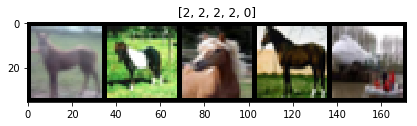

In [12]:
from torchhk.vis import *
train_img, train_label = iter(train_loader).next()
ax = init_plot(title=train_label.numpy().tolist())
plot_img(ax, train_img, ncols=5)